In [1]:
import sys
import os
import numpy as np
import pandas as pd
import gensim
import matplotlib.colors as mcolors
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
from spacy.lang.en.stop_words import STOP_WORDS as en_stop
from spacy.lang.es.stop_words import STOP_WORDS as es_stop
sys.path.append(os.path.realpath('../'))
sys.path.append(os.path.realpath('../../'))

from preprocess_data import Preprocces


Loading stopwords

In [2]:
stop_words = list(fr_stop) + list(en_stop)+ list(es_stop)

**Pre-proccesing data**

In [3]:
data = '../../data/dataset_multilng.csv'

preprocces = Preprocces(data)
df,stats_words = preprocces.clean_dataframe()

[2020-08-02][20:51:29][preprocess_data][INFO] Remove column :Unnamed: 0
[2020-08-02][20:51:29][preprocess_data][INFO] Shape of dataframe:(23128, 3)
[2020-08-02][20:51:29][preprocess_data][INFO] Checking is there is null values
[2020-08-02][20:51:29][preprocess_data][INFO] Remove null values: 1
[2020-08-02][20:51:29][preprocess_data][INFO] Remove digits and digits with words example : 460bc --> ""
[2020-08-02][20:51:49][preprocess_data][INFO] Transform words to lowercase example: Electronics --> electronics
[2020-08-02][20:51:49][preprocess_data][INFO] Remove special characters example : $# -->"" 
[2020-08-02][20:52:21][preprocess_data][INFO] Remove words with lenght less than three example : for --> "" 
[2020-08-02][20:52:25][preprocess_data][INFO] Remove stop words in any language example : para --> "" 
[2020-08-02][20:55:11][preprocess_data][INFO] Remove duplicates values: 120
[2020-08-02][20:55:11][preprocess_data][INFO] Dataframe is cleaned
[2020-08-02][20:55:11][preprocess_data][I

Split text in words

In [4]:
text = df['Cleaned_text'].apply(lambda x: x.split())

In [5]:
text[:100]

0     [read, book, town, uses, order, pharmacist, ad...
1     [recipes, appreciated, family, small, large, r...
2     [ease, author, effort, meet, family, writing, ...
3     [milady, found, good, vein, anita, blake, base...
4     [greece, gentlemen, decided, visit, known, wor...
                            ...                        
95    [houellebecq, philosophical, essays, succeed, ...
96    [story, brothers, twisted, evil, skins, assure...
97    [reading, summary, said, read, book, having, r...
98    [bought, books, bothering, read, couv, like, s...
99    [wonder, origin, evil, understand, meaning, pr...
Name: Cleaned_text, Length: 100, dtype: object

Create a dictionary of text

In [6]:
dictionary = gensim.corpora.Dictionary(text)

[2020-08-02][20:55:22][gensim.corpora.dictionary][INFO] adding document #0 to Dictionary(0 unique tokens: [])
[2020-08-02][20:55:26][gensim.corpora.dictionary][INFO] adding document #10000 to Dictionary(182649 unique tokens: ['able', 'advise', 'advised', 'afraid', 'agreed']...)
[2020-08-02][20:55:37][gensim.corpora.dictionary][INFO] adding document #20000 to Dictionary(622124 unique tokens: ['able', 'advise', 'advised', 'afraid', 'agreed']...)
[2020-08-02][20:55:40][gensim.corpora.dictionary][INFO] built Dictionary(705522 unique tokens: ['able', 'advise', 'advised', 'afraid', 'agreed']...) from 23007 documents (total 10821124 corpus positions)


Filter out tokens that appears at less in 100 documents and no more than 0.5 total of documents

In [7]:
dictionary.filter_extremes(no_below=100, no_above=0.5, keep_n=100000)

[2020-08-02][20:55:42][gensim.corpora.dictionary][INFO] discarding 693918 tokens: [('annotated', 44), ('capsules', 23), ('clicks', 14), ('consolidation', 50), ('deformed', 38), ('kilo', 22), ('offend', 66), ('outperforms', 2), ('pedicure', 2), ('pharmacist', 20)]...
[2020-08-02][20:55:42][gensim.corpora.dictionary][INFO] keeping 11604 tokens which were in no less than 100 and no more than 11503 (=50.0%) documents
[2020-08-02][20:55:42][gensim.corpora.dictionary][INFO] resulting dictionary: Dictionary(11604 unique tokens: ['able', 'advise', 'advised', 'afraid', 'agreed']...)


Transform text to bag-of-words

In [8]:
bow_corpus = [dictionary.doc2bow(doc) for doc in text]


In [9]:
bow_corpus[2]

[(7, 2),
 (10, 2),
 (20, 1),
 (45, 1),
 (51, 1),
 (65, 1),
 (69, 1),
 (78, 2),
 (79, 1),
 (80, 1),
 (81, 1),
 (82, 1),
 (83, 1),
 (84, 1),
 (85, 1),
 (86, 1),
 (87, 1),
 (88, 1),
 (89, 1),
 (90, 2),
 (91, 2),
 (92, 1),
 (93, 1),
 (94, 1),
 (95, 1),
 (96, 1),
 (97, 1),
 (98, 1),
 (99, 1),
 (100, 1)]

In [10]:
bow_doc_2 = bow_corpus[2]
for i in range(len(bow_doc_2)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_2[i][0], 
                                               dictionary[bow_doc_2[i][0]], bow_doc_2[i][1]))

Word 7 ("author") appears 2 time.
Word 10 ("book") appears 2 time.
Word 20 ("effort") appears 1 time.
Word 45 ("read") appears 1 time.
Word 51 ("speak") appears 1 time.
Word 65 ("want") appears 1 time.
Word 69 ("family") appears 1 time.
Word 78 ("artist") appears 2 time.
Word 79 ("ashamed") appears 1 time.
Word 80 ("association") appears 1 time.
Word 81 ("brother") appears 1 time.
Word 82 ("character") appears 1 time.
Word 83 ("correctly") appears 1 time.
Word 84 ("death") appears 1 time.
Word 85 ("ease") appears 1 time.
Word 86 ("enjoy") appears 1 time.
Word 87 ("fans") appears 1 time.
Word 88 ("frankly") appears 1 time.
Word 89 ("fully") appears 1 time.
Word 90 ("good") appears 2 time.
Word 91 ("gregory") appears 2 time.
Word 92 ("interested") appears 1 time.
Word 93 ("knows") appears 1 time.
Word 94 ("lifetime") appears 1 time.
Word 95 ("meet") appears 1 time.
Word 96 ("pain") appears 1 time.
Word 97 ("place") appears 1 time.
Word 98 ("sister") appears 1 time.
Word 99 ("wanting") ap

In [11]:
Lda = gensim.models.ldamodel.LdaModel

In [12]:
lda_model = Lda(bow_corpus, num_topics=10, chunksize=1000,id2word=dictionary, passes=10,alpha='symmetric',iterations=100,
                per_word_topics=True)

[2020-08-02][20:55:47][gensim.models.ldamodel][INFO] using symmetric alpha at 0.1
[2020-08-02][20:55:47][gensim.models.ldamodel][INFO] using symmetric eta at 0.1
[2020-08-02][20:55:47][gensim.models.ldamodel][INFO] using serial LDA version on this node
[2020-08-02][20:55:47][gensim.models.ldamodel][INFO] running online (multi-pass) LDA training, 10 topics, 10 passes over the supplied corpus of 23007 documents, updating model once every 1000 documents, evaluating perplexity every 10000 documents, iterating 100x with a convergence threshold of 0.001000
[2020-08-02][20:55:47][gensim.models.ldamodel][INFO] PROGRESS: pass 0, at document #1000/23007
[2020-08-02][20:55:48][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 23007 documents
[2020-08-02][20:55:48][gensim.models.ldamodel][INFO] topic #4 (0.100): 0.043*"book" + 0.020*"read" + 0.012*"story" + 0.009*"life" + 0.007*"reading" + 0.007*"characters" + 0.007*"love" + 0.006*"good" + 0.006*"pages" + 0.006*"lit

[2020-08-02][20:55:51][gensim.models.ldamodel][INFO] topic #0 (0.100): 0.028*"film" + 0.027*"chose" + 0.027*"monde" + 0.023*"groupe" + 0.013*"série" + 0.012*"textes" + 0.011*"aime" + 0.011*"roman" + 0.011*"genre" + 0.011*"voix"
[2020-08-02][20:55:51][gensim.models.ldamodel][INFO] topic #4 (0.100): 0.031*"chansons" + 0.022*"lire" + 0.021*"belle" + 0.018*"songs" + 0.017*"amour" + 0.011*"rock" + 0.010*"arrive" + 0.009*"jour" + 0.009*"petit" + 0.008*"film"
[2020-08-02][20:55:51][gensim.models.ldamodel][INFO] topic #2 (0.100): 0.058*"bref" + 0.024*"minutes" + 0.024*"film" + 0.018*"sujet" + 0.011*"stones" + 0.011*"group" + 0.010*"tracks" + 0.010*"collector" + 0.008*"listen" + 0.008*"attend"
[2020-08-02][20:55:51][gensim.models.ldamodel][INFO] topic #9 (0.100): 0.046*"film" + 0.036*"musique" + 0.028*"voir" + 0.020*"disque" + 0.016*"voix" + 0.013*"version" + 0.011*"titres" + 0.009*"chanson" + 0.008*"groupe" + 0.007*"envie"
[2020-08-02][20:55:51][gensim.models.ldamodel][INFO] topic diff=0.55883

[2020-08-02][20:55:57][gensim.models.ldamodel][INFO] topic #0 (0.100): 0.016*"august" + 0.015*"generated" + 0.012*"television" + 0.010*"members" + 0.009*"roman" + 0.009*"juan" + 0.008*"lady" + 0.008*"html" + 0.008*"temple" + 0.007*"station"
[2020-08-02][20:55:57][gensim.models.ldamodel][INFO] topic diff=0.645080, rho=0.301511
[2020-08-02][20:55:57][gensim.models.ldamodel][INFO] PROGRESS: pass 0, at document #12000/23007
[2020-08-02][20:55:58][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 23007 documents
[2020-08-02][20:55:58][gensim.models.ldamodel][INFO] topic #5 (0.100): 0.008*"time" + 0.006*"international" + 0.006*"later" + 0.006*"year" + 0.006*"known" + 0.005*"world" + 0.005*"years" + 0.005*"album" + 0.005*"united" + 0.005*"band"
[2020-08-02][20:55:58][gensim.models.ldamodel][INFO] topic #6 (0.100): 0.019*"category" + 0.005*"world" + 0.005*"state" + 0.005*"century" + 0.005*"people" + 0.004*"city" + 0.004*"time" + 0.004*"number" + 0.004*"life" + 0

[2020-08-02][20:56:01][gensim.models.ldamodel][INFO] topic #3 (0.100): 0.019*"national" + 0.019*"university" + 0.017*"category" + 0.015*"capital" + 0.011*"march" + 0.009*"william" + 0.009*"january" + 0.009*"december" + 0.009*"david" + 0.009*"saint"
[2020-08-02][20:56:01][gensim.models.ldamodel][INFO] topic #9 (0.100): 0.010*"categoría" + 0.007*"años" + 0.004*"nombre" + 0.004*"forma" + 0.004*"nbsp" + 0.004*"guerra" + 0.004*"unidos" + 0.004*"siglo" + 0.003*"mundo" + 0.003*"historia"
[2020-08-02][20:56:01][gensim.models.ldamodel][INFO] topic #8 (0.100): 0.013*"base" + 0.013*"central" + 0.011*"california" + 0.010*"image" + 0.009*"produce" + 0.007*"henry" + 0.007*"sound" + 0.006*"forms" + 0.005*"reached" + 0.005*"control"
[2020-08-02][20:56:01][gensim.models.ldamodel][INFO] topic #2 (0.100): 0.018*"city" + 0.013*"june" + 0.012*"british" + 0.011*"south" + 0.010*"army" + 0.010*"july" + 0.009*"park" + 0.007*"india" + 0.007*"member" + 0.007*"continued"
[2020-08-02][20:56:01][gensim.models.ldamo

[2020-08-02][20:56:04][gensim.models.ldamodel][INFO] topic #1 (0.100): 0.018*"libre" + 0.017*"center" + 0.011*"quartier" + 0.011*"zones" + 0.011*"protection" + 0.011*"transport" + 0.010*"entreprise" + 0.010*"critique" + 0.009*"standard" + 0.009*"million"
[2020-08-02][20:56:04][gensim.models.ldamodel][INFO] topic diff=0.143806, rho=0.213201
[2020-08-02][20:56:04][gensim.models.ldamodel][INFO] PROGRESS: pass 0, at document #23000/23007
[2020-08-02][20:56:04][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 23007 documents
[2020-08-02][20:56:04][gensim.models.ldamodel][INFO] topic #7 (0.100): 0.012*"nbsp" + 0.012*"catégorie" + 0.008*"france" + 0.007*"année" + 0.007*"monde" + 0.006*"suite" + 0.006*"centre" + 0.006*"pierre" + 0.006*"europe" + 0.006*"région"
[2020-08-02][20:56:04][gensim.models.ldamodel][INFO] topic #2 (0.100): 0.018*"château" + 0.015*"occasion" + 0.014*"sujet" + 0.013*"city" + 0.013*"park" + 0.011*"minutes" + 0.011*"moore" + 0.010*"clubs" + 

[2020-08-02][20:56:06][gensim.models.ldamodel][INFO] topic #1 (0.100): 0.026*"automobile" + 0.021*"chris" + 0.015*"libre" + 0.013*"protection" + 0.012*"center" + 0.010*"types" + 0.009*"entreprise" + 0.009*"solution" + 0.009*"critique" + 0.009*"quartier"
[2020-08-02][20:56:06][gensim.models.ldamodel][INFO] topic #4 (0.100): 0.016*"fire" + 0.011*"jour" + 0.011*"musique" + 0.008*"like" + 0.008*"book" + 0.007*"beautiful" + 0.006*"love" + 0.006*"petit" + 0.006*"chansons" + 0.006*"route"
[2020-08-02][20:56:06][gensim.models.ldamodel][INFO] topic #0 (0.100): 0.104*"catégorie" + 0.028*"film" + 0.025*"groupe" + 0.016*"palais" + 0.011*"septembre" + 0.010*"grands" + 0.010*"metal" + 0.010*"html" + 0.010*"monde" + 0.010*"album"
[2020-08-02][20:56:07][gensim.models.ldamodel][INFO] topic #9 (0.100): 0.008*"categoría" + 0.006*"armée" + 0.005*"años" + 0.005*"habitants" + 0.004*"nombre" + 0.004*"territoire" + 0.004*"musique" + 0.004*"zone" + 0.004*"septembre" + 0.004*"charlie"
[2020-08-02][20:56:07][gen

[2020-08-02][20:56:09][gensim.models.ldamodel][INFO] topic #5 (0.100): 0.010*"said" + 0.010*"time" + 0.008*"good" + 0.007*"come" + 0.006*"great" + 0.006*"know" + 0.005*"people" + 0.005*"like" + 0.004*"left" + 0.004*"eyes"
[2020-08-02][20:56:09][gensim.models.ldamodel][INFO] topic #1 (0.100): 0.012*"body" + 0.010*"showed" + 0.009*"mass" + 0.009*"libre" + 0.009*"center" + 0.007*"danger" + 0.007*"crowd" + 0.007*"service" + 0.007*"lake" + 0.006*"notice"
[2020-08-02][20:56:09][gensim.models.ldamodel][INFO] topic diff=0.264910, rho=0.199972
[2020-08-02][20:56:10][gensim.models.ldamodel][INFO] -8.652 per-word bound, 402.4 perplexity estimate based on a held-out corpus of 1000 documents with 481113 words
[2020-08-02][20:56:10][gensim.models.ldamodel][INFO] PROGRESS: pass 1, at document #10000/23007
[2020-08-02][20:56:11][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 23007 documents
[2020-08-02][20:56:11][gensim.models.ldamodel][INFO] topic #2 (0.100): 0.019*

[2020-08-02][20:56:16][gensim.models.ldamodel][INFO] topic #1 (0.100): 0.010*"center" + 0.010*"based" + 0.010*"system" + 0.008*"german" + 0.007*"service" + 0.007*"research" + 0.007*"germany" + 0.007*"million" + 0.007*"development" + 0.007*"standard"
[2020-08-02][20:56:16][gensim.models.ldamodel][INFO] topic #6 (0.100): 0.011*"category" + 0.006*"century" + 0.005*"ciudad" + 0.005*"state" + 0.005*"world" + 0.004*"people" + 0.004*"county" + 0.004*"east" + 0.004*"states" + 0.004*"known"
[2020-08-02][20:56:16][gensim.models.ldamodel][INFO] topic #5 (0.100): 0.009*"time" + 0.006*"world" + 0.006*"international" + 0.006*"years" + 0.005*"later" + 0.005*"known" + 0.005*"year" + 0.005*"band" + 0.004*"album" + 0.004*"released"
[2020-08-02][20:56:16][gensim.models.ldamodel][INFO] topic #3 (0.100): 0.045*"category" + 0.019*"national" + 0.018*"university" + 0.013*"team" + 0.011*"march" + 0.011*"ndash" + 0.011*"club" + 0.009*"quot" + 0.009*"january" + 0.009*"december"
[2020-08-02][20:56:16][gensim.mode

[2020-08-02][20:56:21][gensim.models.ldamodel][INFO] topic #8 (0.100): 0.009*"catégorie" + 0.008*"ville" + 0.006*"saint" + 0.005*"également" + 0.004*"années" + 0.004*"image" + 0.004*"tour" + 0.004*"partie" + 0.004*"guerre" + 0.004*"paris"
[2020-08-02][20:56:21][gensim.models.ldamodel][INFO] topic #9 (0.100): 0.010*"categoría" + 0.007*"años" + 0.004*"nombre" + 0.004*"guerra" + 0.004*"forma" + 0.003*"historia" + 0.003*"siglo" + 0.003*"unidos" + 0.003*"mundo" + 0.003*"vida"
[2020-08-02][20:56:21][gensim.models.ldamodel][INFO] topic diff=0.144796, rho=0.199972
[2020-08-02][20:56:21][gensim.models.ldamodel][INFO] PROGRESS: pass 1, at document #21000/23007
[2020-08-02][20:56:22][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 23007 documents
[2020-08-02][20:56:22][gensim.models.ldamodel][INFO] topic #2 (0.100): 0.022*"city" + 0.012*"south" + 0.011*"château" + 0.011*"british" + 0.010*"park" + 0.009*"june" + 0.008*"occasion" + 0.008*"july" + 0.008*"clubs" + 0.

[2020-08-02][20:56:24][gensim.models.ldamodel][INFO] topic diff=0.149566, rho=0.196090
[2020-08-02][20:56:24][gensim.models.ldamodel][INFO] PROGRESS: pass 2, at document #2000/23007
[2020-08-02][20:56:25][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 23007 documents
[2020-08-02][20:56:25][gensim.models.ldamodel][INFO] topic #5 (0.100): 0.017*"freedom" + 0.012*"international" + 0.008*"time" + 0.007*"province" + 0.006*"album" + 0.006*"déjà" + 0.006*"rock" + 0.006*"world" + 0.006*"book" + 0.005*"movie"
[2020-08-02][20:56:25][gensim.models.ldamodel][INFO] topic #7 (0.100): 0.024*"reine" + 0.017*"catégorie" + 0.017*"nbsp" + 0.011*"année" + 0.008*"suite" + 0.008*"centre" + 0.008*"france" + 0.008*"europe" + 0.008*"prince" + 0.007*"princesse"
[2020-08-02][20:56:25][gensim.models.ldamodel][INFO] topic #4 (0.100): 0.019*"fire" + 0.018*"musique" + 0.012*"jour" + 0.012*"book" + 0.008*"petit" + 0.007*"james" + 0.006*"love" + 0.006*"route" + 0.006*"read" + 0.006*"

[2020-08-02][20:56:27][gensim.models.ldamodel][INFO] topic #1 (0.100): 0.012*"automobile" + 0.010*"chris" + 0.009*"center" + 0.007*"types" + 0.007*"service" + 0.007*"libre" + 0.007*"protection" + 0.007*"mass" + 0.007*"system" + 0.006*"administration"
[2020-08-02][20:56:27][gensim.models.ldamodel][INFO] topic #9 (0.100): 0.009*"categoría" + 0.006*"años" + 0.004*"zone" + 0.004*"espace" + 0.004*"territoire" + 0.004*"nombre" + 0.003*"guerra" + 0.003*"bgcolor" + 0.003*"comité" + 0.003*"forma"
[2020-08-02][20:56:27][gensim.models.ldamodel][INFO] topic #5 (0.100): 0.010*"time" + 0.007*"good" + 0.007*"said" + 0.007*"album" + 0.006*"great" + 0.006*"come" + 0.005*"years" + 0.005*"know" + 0.005*"like" + 0.005*"people"
[2020-08-02][20:56:27][gensim.models.ldamodel][INFO] topic diff=0.397124, rho=0.196090
[2020-08-02][20:56:27][gensim.models.ldamodel][INFO] PROGRESS: pass 2, at document #8000/23007
[2020-08-02][20:56:27][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model

[2020-08-02][20:56:32][gensim.models.ldamodel][INFO] topic diff=0.237177, rho=0.196090
[2020-08-02][20:56:32][gensim.models.ldamodel][INFO] PROGRESS: pass 2, at document #13000/23007
[2020-08-02][20:56:33][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 23007 documents
[2020-08-02][20:56:33][gensim.models.ldamodel][INFO] topic #8 (0.100): 0.021*"september" + 0.012*"italian" + 0.011*"sound" + 0.009*"forms" + 0.009*"reached" + 0.007*"produce" + 0.007*"typically" + 0.007*"campaign" + 0.006*"saint" + 0.006*"berlin"
[2020-08-02][20:56:33][gensim.models.ldamodel][INFO] topic #6 (0.100): 0.007*"century" + 0.006*"state" + 0.006*"category" + 0.005*"church" + 0.005*"east" + 0.004*"county" + 0.004*"people" + 0.004*"world" + 0.004*"october" + 0.004*"york"
[2020-08-02][20:56:33][gensim.models.ldamodel][INFO] topic #9 (0.100): 0.007*"casa" + 0.005*"vida" + 0.005*"hombre" + 0.005*"featured" + 0.005*"ojos" + 0.004*"dios" + 0.004*"edward" + 0.004*"años" + 0.004*"noche"

[2020-08-02][20:56:36][gensim.models.ldamodel][INFO] topic #1 (0.100): 0.013*"system" + 0.011*"center" + 0.009*"based" + 0.008*"base" + 0.007*"power" + 0.007*"service" + 0.007*"modern" + 0.007*"german" + 0.007*"research" + 0.006*"development"
[2020-08-02][20:56:36][gensim.models.ldamodel][INFO] topic #3 (0.100): 0.048*"category" + 0.017*"national" + 0.016*"quot" + 0.016*"university" + 0.015*"club" + 0.011*"team" + 0.011*"ndash" + 0.010*"david" + 0.009*"march" + 0.009*"football"
[2020-08-02][20:56:36][gensim.models.ldamodel][INFO] topic diff=0.227618, rho=0.196090
[2020-08-02][20:56:36][gensim.models.ldamodel][INFO] PROGRESS: pass 2, at document #19000/23007
[2020-08-02][20:56:36][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 23007 documents
[2020-08-02][20:56:36][gensim.models.ldamodel][INFO] topic #8 (0.100): 0.012*"catégorie" + 0.007*"ville" + 0.006*"saint" + 0.005*"également" + 0.004*"années" + 0.004*"famille" + 0.004*"tour" + 0.004*"paris" + 0.00

[2020-08-02][20:56:39][gensim.models.ldamodel][INFO] PROGRESS: pass 2, at document #23007/23007
[2020-08-02][20:56:39][gensim.models.ldamodel][INFO] merging changes from 7 documents into a model of 23007 documents
[2020-08-02][20:56:39][gensim.models.ldamodel][INFO] topic #8 (0.100): 0.018*"catégorie" + 0.007*"ville" + 0.005*"également" + 0.005*"saint" + 0.005*"années" + 0.004*"groupe" + 0.004*"guerre" + 0.004*"paris" + 0.004*"partie" + 0.004*"grande"
[2020-08-02][20:56:39][gensim.models.ldamodel][INFO] topic #5 (0.100): 0.017*"international" + 0.010*"freedom" + 0.009*"province" + 0.008*"time" + 0.008*"rock" + 0.007*"henri" + 0.006*"world" + 0.005*"sport" + 0.005*"white" + 0.005*"years"
[2020-08-02][20:56:39][gensim.models.ldamodel][INFO] topic #2 (0.100): 0.029*"château" + 0.023*"city" + 0.023*"occasion" + 0.011*"south" + 0.010*"sujet" + 0.010*"park" + 0.010*"british" + 0.010*"minutes" + 0.009*"clubs" + 0.008*"moore"
[2020-08-02][20:56:39][gensim.models.ldamodel][INFO] topic #6 (0.100

[2020-08-02][20:56:41][gensim.models.ldamodel][INFO] topic #9 (0.100): 0.009*"categoría" + 0.006*"años" + 0.004*"zone" + 0.004*"territoire" + 0.004*"nombre" + 0.004*"espace" + 0.004*"guerra" + 0.003*"forma" + 0.003*"bgcolor" + 0.003*"comité"
[2020-08-02][20:56:41][gensim.models.ldamodel][INFO] topic #3 (0.100): 0.039*"pays" + 0.021*"club" + 0.018*"national" + 0.017*"mars" + 0.016*"category" + 0.014*"football" + 0.012*"william" + 0.012*"allemagne" + 0.011*"tournée" + 0.011*"david"
[2020-08-02][20:56:41][gensim.models.ldamodel][INFO] topic diff=0.156480, rho=0.192425
[2020-08-02][20:56:41][gensim.models.ldamodel][INFO] PROGRESS: pass 3, at document #6000/23007
[2020-08-02][20:56:41][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 23007 documents
[2020-08-02][20:56:41][gensim.models.ldamodel][INFO] topic #1 (0.100): 0.020*"automobile" + 0.016*"chris" + 0.011*"types" + 0.010*"center" + 0.010*"protection" + 0.009*"power" + 0.008*"system" + 0.008*"administra

[2020-08-02][20:56:45][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 23007 documents
[2020-08-02][20:56:45][gensim.models.ldamodel][INFO] topic #4 (0.100): 0.009*"said" + 0.008*"came" + 0.007*"house" + 0.007*"like" + 0.006*"love" + 0.006*"water" + 0.006*"time" + 0.006*"home" + 0.005*"long" + 0.005*"life"
[2020-08-02][20:56:45][gensim.models.ldamodel][INFO] topic #7 (0.100): 0.046*"nbsp" + 0.017*"party" + 0.013*"april" + 0.011*"quot" + 0.011*"located" + 0.011*"france" + 0.009*"developed" + 0.008*"data" + 0.008*"centre" + 0.008*"europe"
[2020-08-02][20:56:45][gensim.models.ldamodel][INFO] topic #8 (0.100): 0.011*"catégorie" + 0.010*"september" + 0.006*"sound" + 0.006*"italian" + 0.006*"reached" + 0.005*"forms" + 0.005*"saint" + 0.005*"produce" + 0.004*"tour" + 0.004*"paris"
[2020-08-02][20:56:45][gensim.models.ldamodel][INFO] topic #0 (0.100): 0.034*"album" + 0.034*"film" + 0.021*"john" + 0.015*"music" + 0.014*"league" + 0.013*"metal" + 0.012*"august" 

[2020-08-02][20:56:48][gensim.models.ldamodel][INFO] topic #7 (0.100): 0.061*"nbsp" + 0.018*"party" + 0.015*"april" + 0.012*"france" + 0.011*"video" + 0.011*"located" + 0.010*"quot" + 0.010*"data" + 0.010*"developed" + 0.009*"george"
[2020-08-02][20:56:48][gensim.models.ldamodel][INFO] topic diff=0.154267, rho=0.192425
[2020-08-02][20:56:48][gensim.models.ldamodel][INFO] PROGRESS: pass 3, at document #17000/23007
[2020-08-02][20:56:48][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 23007 documents
[2020-08-02][20:56:48][gensim.models.ldamodel][INFO] topic #4 (0.100): 0.007*"house" + 0.007*"water" + 0.006*"like" + 0.006*"time" + 0.006*"came" + 0.006*"love" + 0.006*"said" + 0.006*"software" + 0.006*"home" + 0.005*"long"
[2020-08-02][20:56:48][gensim.models.ldamodel][INFO] topic #8 (0.100): 0.020*"september" + 0.011*"produce" + 0.011*"italian" + 0.010*"sound" + 0.010*"saint" + 0.008*"tour" + 0.008*"forms" + 0.008*"reached" + 0.007*"campaign" + 0.007*"typ

[2020-08-02][20:56:51][gensim.models.ldamodel][INFO] topic #7 (0.100): 0.030*"nbsp" + 0.012*"année" + 0.011*"centre" + 0.010*"pierre" + 0.010*"suite" + 0.010*"france" + 0.009*"grand" + 0.008*"louis" + 0.008*"europe" + 0.008*"prix"
[2020-08-02][20:56:51][gensim.models.ldamodel][INFO] topic #4 (0.100): 0.016*"musique" + 0.014*"jour" + 0.010*"petit" + 0.010*"james" + 0.008*"route" + 0.007*"iran" + 0.006*"love" + 0.006*"house" + 0.006*"sources" + 0.006*"noir"
[2020-08-02][20:56:51][gensim.models.ldamodel][INFO] topic #2 (0.100): 0.026*"city" + 0.011*"south" + 0.011*"château" + 0.010*"british" + 0.009*"park" + 0.009*"occasion" + 0.008*"sujet" + 0.008*"game" + 0.008*"minutes" + 0.008*"river"
[2020-08-02][20:56:51][gensim.models.ldamodel][INFO] topic #8 (0.100): 0.014*"catégorie" + 0.008*"ville" + 0.005*"saint" + 0.005*"également" + 0.004*"années" + 0.004*"monde" + 0.004*"guerre" + 0.004*"partie" + 0.004*"nord" + 0.004*"groupe"
[2020-08-02][20:56:51][gensim.models.ldamodel][INFO] topic diff=0

[2020-08-02][20:56:52][gensim.models.ldamodel][INFO] topic #6 (0.100): 0.049*"lorenzo" + 0.045*"ponte" + 0.013*"della" + 0.010*"ciudad" + 0.009*"thumb" + 0.008*"york" + 0.008*"union" + 0.007*"association" + 0.007*"charlie" + 0.006*"portugal"
[2020-08-02][20:56:52][gensim.models.ldamodel][INFO] topic diff=0.137737, rho=0.188959
[2020-08-02][20:56:52][gensim.models.ldamodel][INFO] PROGRESS: pass 4, at document #4000/23007
[2020-08-02][20:56:52][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 23007 documents
[2020-08-02][20:56:52][gensim.models.ldamodel][INFO] topic #4 (0.100): 0.016*"fire" + 0.015*"musique" + 0.010*"jour" + 0.009*"love" + 0.008*"petit" + 0.007*"book" + 0.007*"like" + 0.006*"james" + 0.006*"time" + 0.005*"beautiful"
[2020-08-02][20:56:52][gensim.models.ldamodel][INFO] topic #1 (0.100): 0.020*"automobile" + 0.016*"chris" + 0.011*"power" + 0.011*"types" + 0.010*"center" + 0.010*"protection" + 0.009*"system" + 0.008*"base" + 0.007*"solution"

[2020-08-02][20:56:54][gensim.models.ldamodel][INFO] topic #4 (0.100): 0.014*"said" + 0.010*"came" + 0.009*"love" + 0.008*"house" + 0.007*"know" + 0.007*"like" + 0.006*"face" + 0.006*"time" + 0.006*"gave" + 0.005*"life"
[2020-08-02][20:56:54][gensim.models.ldamodel][INFO] topic #8 (0.100): 0.015*"catégorie" + 0.005*"ville" + 0.004*"années" + 0.004*"également" + 0.004*"groupe" + 0.004*"saint" + 0.004*"histoire" + 0.004*"fois" + 0.004*"monde" + 0.004*"faire"
[2020-08-02][20:56:54][gensim.models.ldamodel][INFO] topic #1 (0.100): 0.010*"showed" + 0.009*"mass" + 0.009*"center" + 0.008*"power" + 0.007*"system" + 0.007*"danger" + 0.007*"crowd" + 0.007*"lake" + 0.007*"service" + 0.006*"objects"
[2020-08-02][20:56:54][gensim.models.ldamodel][INFO] topic #2 (0.100): 0.023*"city" + 0.016*"river" + 0.012*"indians" + 0.011*"continued" + 0.009*"arms" + 0.009*"spanish" + 0.009*"captain" + 0.008*"tried" + 0.008*"people" + 0.008*"enemy"
[2020-08-02][20:56:54][gensim.models.ldamodel][INFO] topic diff=0.

[2020-08-02][20:56:59][gensim.models.ldamodel][INFO] topic #3 (0.100): 0.071*"category" + 0.020*"quot" + 0.017*"national" + 0.017*"university" + 0.016*"united" + 0.014*"team" + 0.013*"ndash" + 0.013*"world" + 0.012*"american" + 0.011*"march"
[2020-08-02][20:56:59][gensim.models.ldamodel][INFO] topic diff=0.095976, rho=0.188959
[2020-08-02][20:56:59][gensim.models.ldamodel][INFO] PROGRESS: pass 4, at document #15000/23007
[2020-08-02][20:56:59][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 23007 documents
[2020-08-02][20:56:59][gensim.models.ldamodel][INFO] topic #7 (0.100): 0.056*"nbsp" + 0.020*"party" + 0.016*"april" + 0.012*"france" + 0.012*"located" + 0.012*"video" + 0.010*"george" + 0.010*"developed" + 0.010*"films" + 0.010*"data"
[2020-08-02][20:56:59][gensim.models.ldamodel][INFO] topic #4 (0.100): 0.008*"house" + 0.007*"water" + 0.007*"came" + 0.007*"said" + 0.006*"time" + 0.006*"home" + 0.006*"local" + 0.006*"like" + 0.006*"love" + 0.005*"lon

[2020-08-02][20:57:02][gensim.models.ldamodel][INFO] topic #7 (0.100): 0.037*"nbsp" + 0.011*"année" + 0.010*"centre" + 0.010*"france" + 0.010*"pierre" + 0.009*"louis" + 0.009*"grand" + 0.009*"canada" + 0.009*"suite" + 0.008*"prix"
[2020-08-02][20:57:02][gensim.models.ldamodel][INFO] topic #6 (0.100): 0.016*"ciudad" + 0.011*"thumb" + 0.006*"capital" + 0.006*"century" + 0.006*"state" + 0.006*"union" + 0.006*"madrid" + 0.005*"central" + 0.005*"county" + 0.005*"north"
[2020-08-02][20:57:02][gensim.models.ldamodel][INFO] topic #3 (0.100): 0.040*"category" + 0.020*"quot" + 0.018*"pays" + 0.018*"club" + 0.017*"national" + 0.013*"university" + 0.011*"world" + 0.011*"united" + 0.011*"football" + 0.010*"michael"
[2020-08-02][20:57:02][gensim.models.ldamodel][INFO] topic #9 (0.100): 0.010*"categoría" + 0.007*"años" + 0.004*"nombre" + 0.004*"guerra" + 0.004*"forma" + 0.003*"historia" + 0.003*"siglo" + 0.003*"mundo" + 0.003*"vida" + 0.003*"unidos"
[2020-08-02][20:57:02][gensim.models.ldamodel][INFO

[2020-08-02][20:57:03][gensim.models.ldamodel][INFO] topic #0 (0.100): 0.059*"film" + 0.043*"album" + 0.034*"freedom" + 0.021*"john" + 0.015*"palais" + 0.014*"metal" + 0.014*"live" + 0.011*"grands" + 0.010*"groupe" + 0.010*"robert"
[2020-08-02][20:57:03][gensim.models.ldamodel][INFO] topic diff=0.149007, rho=0.185673
[2020-08-02][20:57:04][gensim.models.ldamodel][INFO] PROGRESS: pass 5, at document #2000/23007
[2020-08-02][20:57:04][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 23007 documents
[2020-08-02][20:57:04][gensim.models.ldamodel][INFO] topic #9 (0.100): 0.009*"categoría" + 0.006*"años" + 0.004*"nombre" + 0.004*"zone" + 0.004*"guerra" + 0.004*"espace" + 0.003*"forma" + 0.003*"bgcolor" + 0.003*"historia" + 0.003*"comité"
[2020-08-02][20:57:04][gensim.models.ldamodel][INFO] topic #3 (0.100): 0.039*"pays" + 0.022*"club" + 0.022*"category" + 0.019*"national" + 0.017*"mars" + 0.016*"quot" + 0.016*"football" + 0.012*"william" + 0.012*"allemagne" +

[2020-08-02][20:57:05][gensim.models.ldamodel][INFO] topic #6 (0.100): 0.025*"lorenzo" + 0.023*"ponte" + 0.007*"della" + 0.007*"lady" + 0.006*"madrid" + 0.006*"church" + 0.006*"state" + 0.005*"ciudad" + 0.005*"island" + 0.005*"thumb"
[2020-08-02][20:57:05][gensim.models.ldamodel][INFO] topic #3 (0.100): 0.031*"pays" + 0.017*"club" + 0.017*"category" + 0.016*"national" + 0.013*"mars" + 0.012*"football" + 0.012*"quot" + 0.010*"chansons" + 0.009*"david" + 0.009*"william"
[2020-08-02][20:57:05][gensim.models.ldamodel][INFO] topic #5 (0.100): 0.010*"time" + 0.008*"good" + 0.007*"great" + 0.007*"like" + 0.006*"said" + 0.006*"people" + 0.006*"years" + 0.005*"come" + 0.005*"know" + 0.005*"work"
[2020-08-02][20:57:05][gensim.models.ldamodel][INFO] topic #8 (0.100): 0.015*"catégorie" + 0.005*"ville" + 0.004*"années" + 0.004*"groupe" + 0.004*"également" + 0.004*"histoire" + 0.004*"fois" + 0.004*"saint" + 0.004*"monde" + 0.004*"faire"
[2020-08-02][20:57:05][gensim.models.ldamodel][INFO] topic diff

[2020-08-02][20:57:09][gensim.models.ldamodel][INFO] topic diff=0.227631, rho=0.185673
[2020-08-02][20:57:09][gensim.models.ldamodel][INFO] PROGRESS: pass 5, at document #13000/23007
[2020-08-02][20:57:10][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 23007 documents
[2020-08-02][20:57:10][gensim.models.ldamodel][INFO] topic #9 (0.100): 0.007*"casa" + 0.005*"vida" + 0.005*"hombre" + 0.005*"ojos" + 0.004*"dios" + 0.004*"edward" + 0.004*"años" + 0.004*"noche" + 0.003*"señor" + 0.003*"mundo"
[2020-08-02][20:57:10][gensim.models.ldamodel][INFO] topic #2 (0.100): 0.030*"city" + 0.012*"south" + 0.011*"area" + 0.010*"british" + 0.009*"june" + 0.009*"game" + 0.009*"july" + 0.008*"river" + 0.007*"population" + 0.007*"army"
[2020-08-02][20:57:10][gensim.models.ldamodel][INFO] topic #5 (0.100): 0.010*"time" + 0.007*"years" + 0.006*"later" + 0.005*"known" + 0.005*"people" + 0.005*"like" + 0.005*"world" + 0.005*"international" + 0.005*"work" + 0.005*"called"
[202

[2020-08-02][20:57:12][gensim.models.ldamodel][INFO] topic #8 (0.100): 0.011*"catégorie" + 0.007*"saint" + 0.006*"ville" + 0.006*"september" + 0.005*"paris" + 0.005*"france" + 0.005*"tour" + 0.004*"également" + 0.004*"jean" + 0.004*"années"
[2020-08-02][20:57:12][gensim.models.ldamodel][INFO] topic #2 (0.100): 0.029*"city" + 0.012*"south" + 0.010*"area" + 0.010*"british" + 0.009*"game" + 0.009*"june" + 0.008*"july" + 0.008*"river" + 0.007*"population" + 0.007*"army"
[2020-08-02][20:57:12][gensim.models.ldamodel][INFO] topic diff=0.204829, rho=0.185673
[2020-08-02][20:57:12][gensim.models.ldamodel][INFO] PROGRESS: pass 5, at document #19000/23007
[2020-08-02][20:57:12][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 23007 documents
[2020-08-02][20:57:12][gensim.models.ldamodel][INFO] topic #8 (0.100): 0.013*"catégorie" + 0.007*"ville" + 0.006*"saint" + 0.004*"également" + 0.004*"france" + 0.004*"monde" + 0.004*"tour" + 0.004*"années" + 0.004*"famille" +

[2020-08-02][20:57:15][gensim.models.ldamodel][INFO] PROGRESS: pass 5, at document #23007/23007
[2020-08-02][20:57:15][gensim.models.ldamodel][INFO] merging changes from 7 documents into a model of 23007 documents
[2020-08-02][20:57:15][gensim.models.ldamodel][INFO] topic #7 (0.100): 0.031*"reine" + 0.025*"nbsp" + 0.015*"année" + 0.011*"centre" + 0.011*"suite" + 0.011*"prince" + 0.010*"princesse" + 0.009*"france" + 0.009*"pierre" + 0.008*"grand"
[2020-08-02][20:57:15][gensim.models.ldamodel][INFO] topic #8 (0.100): 0.018*"catégorie" + 0.006*"ville" + 0.005*"également" + 0.005*"saint" + 0.004*"années" + 0.004*"groupe" + 0.004*"monde" + 0.004*"france" + 0.004*"guerre" + 0.004*"paris"
[2020-08-02][20:57:15][gensim.models.ldamodel][INFO] topic #5 (0.100): 0.016*"international" + 0.009*"time" + 0.008*"province" + 0.006*"rock" + 0.006*"henri" + 0.006*"years" + 0.005*"sport" + 0.005*"world" + 0.004*"people" + 0.004*"white"
[2020-08-02][20:57:15][gensim.models.ldamodel][INFO] topic #9 (0.100):

[2020-08-02][20:57:16][gensim.models.ldamodel][INFO] topic #7 (0.100): 0.029*"reine" + 0.024*"nbsp" + 0.014*"année" + 0.012*"suite" + 0.011*"prince" + 0.011*"centre" + 0.009*"princesse" + 0.009*"france" + 0.009*"grand" + 0.009*"pierre"
[2020-08-02][20:57:16][gensim.models.ldamodel][INFO] topic #1 (0.100): 0.019*"automobile" + 0.015*"chris" + 0.010*"types" + 0.010*"center" + 0.010*"power" + 0.009*"protection" + 0.009*"system" + 0.008*"base" + 0.007*"solution" + 0.007*"entreprise"
[2020-08-02][20:57:16][gensim.models.ldamodel][INFO] topic diff=0.152677, rho=0.182553
[2020-08-02][20:57:16][gensim.models.ldamodel][INFO] PROGRESS: pass 6, at document #6000/23007
[2020-08-02][20:57:16][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 23007 documents
[2020-08-02][20:57:16][gensim.models.ldamodel][INFO] topic #0 (0.100): 0.084*"film" + 0.081*"album" + 0.024*"freedom" + 0.018*"john" + 0.014*"live" + 0.014*"music" + 0.013*"version" + 0.012*"metal" + 0.010*"palais

[2020-08-02][20:57:20][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 23007 documents
[2020-08-02][20:57:20][gensim.models.ldamodel][INFO] topic #9 (0.100): 0.007*"casa" + 0.006*"hombre" + 0.006*"vida" + 0.005*"ojos" + 0.005*"dios" + 0.004*"años" + 0.004*"noche" + 0.004*"señor" + 0.004*"mundo" + 0.004*"hombres"
[2020-08-02][20:57:20][gensim.models.ldamodel][INFO] topic #1 (0.100): 0.012*"system" + 0.010*"number" + 0.009*"power" + 0.009*"form" + 0.009*"based" + 0.008*"language" + 0.008*"example" + 0.008*"modern" + 0.007*"center" + 0.006*"line"
[2020-08-02][20:57:20][gensim.models.ldamodel][INFO] topic #8 (0.100): 0.012*"catégorie" + 0.009*"september" + 0.006*"sound" + 0.005*"italian" + 0.005*"reached" + 0.005*"saint" + 0.005*"tour" + 0.005*"forms" + 0.004*"ville" + 0.004*"produce"
[2020-08-02][20:57:20][gensim.models.ldamodel][INFO] topic #2 (0.100): 0.031*"city" + 0.010*"south" + 0.009*"area" + 0.009*"river" + 0.009*"british" + 0.008*"people" + 0.008*

[2020-08-02][20:57:22][gensim.models.ldamodel][INFO] topic #5 (0.100): 0.010*"time" + 0.007*"years" + 0.005*"later" + 0.005*"like" + 0.005*"people" + 0.005*"international" + 0.005*"known" + 0.005*"work" + 0.005*"world" + 0.005*"great"
[2020-08-02][20:57:22][gensim.models.ldamodel][INFO] topic #8 (0.100): 0.019*"september" + 0.011*"italian" + 0.010*"sound" + 0.010*"produce" + 0.009*"saint" + 0.008*"forms" + 0.008*"tour" + 0.008*"reached" + 0.007*"catégorie" + 0.007*"campaign"
[2020-08-02][20:57:22][gensim.models.ldamodel][INFO] topic diff=0.148279, rho=0.182553
[2020-08-02][20:57:22][gensim.models.ldamodel][INFO] PROGRESS: pass 6, at document #17000/23007
[2020-08-02][20:57:22][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 23007 documents
[2020-08-02][20:57:22][gensim.models.ldamodel][INFO] topic #5 (0.100): 0.010*"time" + 0.007*"years" + 0.005*"international" + 0.005*"like" + 0.005*"later" + 0.005*"people" + 0.005*"known" + 0.005*"work" + 0.005*"worl

[2020-08-02][20:57:25][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 23007 documents
[2020-08-02][20:57:25][gensim.models.ldamodel][INFO] topic #4 (0.100): 0.017*"musique" + 0.014*"jour" + 0.011*"james" + 0.011*"petit" + 0.009*"route" + 0.008*"house" + 0.007*"love" + 0.007*"iran" + 0.006*"sources" + 0.006*"local"
[2020-08-02][20:57:25][gensim.models.ldamodel][INFO] topic #5 (0.100): 0.011*"international" + 0.010*"time" + 0.007*"province" + 0.006*"years" + 0.006*"rock" + 0.005*"like" + 0.005*"people" + 0.004*"great" + 0.004*"later" + 0.004*"henri"
[2020-08-02][20:57:25][gensim.models.ldamodel][INFO] topic #9 (0.100): 0.010*"categoría" + 0.007*"años" + 0.004*"nombre" + 0.004*"guerra" + 0.004*"forma" + 0.003*"historia" + 0.003*"mundo" + 0.003*"siglo" + 0.003*"vida" + 0.003*"unidos"
[2020-08-02][20:57:25][gensim.models.ldamodel][INFO] topic #7 (0.100): 0.033*"nbsp" + 0.012*"année" + 0.011*"centre" + 0.011*"pierre" + 0.011*"suite" + 0.010*"france" + 0.009

[2020-08-02][20:57:27][gensim.models.ldamodel][INFO] topic #6 (0.100): 0.049*"lorenzo" + 0.045*"ponte" + 0.013*"della" + 0.011*"ciudad" + 0.010*"thumb" + 0.008*"union" + 0.007*"york" + 0.007*"association" + 0.007*"maria" + 0.007*"charlie"
[2020-08-02][20:57:27][gensim.models.ldamodel][INFO] topic #9 (0.100): 0.009*"categoría" + 0.006*"años" + 0.004*"nombre" + 0.004*"guerra" + 0.004*"zone" + 0.004*"forma" + 0.003*"espace" + 0.003*"historia" + 0.003*"bgcolor" + 0.003*"comité"
[2020-08-02][20:57:27][gensim.models.ldamodel][INFO] topic #8 (0.100): 0.018*"catégorie" + 0.006*"ville" + 0.005*"également" + 0.005*"saint" + 0.004*"années" + 0.004*"groupe" + 0.004*"monde" + 0.004*"france" + 0.004*"guerre" + 0.004*"partie"
[2020-08-02][20:57:27][gensim.models.ldamodel][INFO] topic diff=0.133271, rho=0.179585
[2020-08-02][20:57:27][gensim.models.ldamodel][INFO] PROGRESS: pass 7, at document #4000/23007
[2020-08-02][20:57:27][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a m

[2020-08-02][20:57:28][gensim.models.ldamodel][INFO] PROGRESS: pass 7, at document #9000/23007
[2020-08-02][20:57:28][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 23007 documents
[2020-08-02][20:57:28][gensim.models.ldamodel][INFO] topic #0 (0.100): 0.052*"film" + 0.050*"album" + 0.023*"freedom" + 0.015*"john" + 0.014*"live" + 0.013*"juan" + 0.012*"music" + 0.010*"metal" + 0.010*"bodies" + 0.009*"temple"
[2020-08-02][20:57:28][gensim.models.ldamodel][INFO] topic #8 (0.100): 0.015*"catégorie" + 0.005*"ville" + 0.004*"groupe" + 0.004*"années" + 0.004*"également" + 0.004*"saint" + 0.004*"histoire" + 0.004*"monde" + 0.004*"fois" + 0.004*"grande"
[2020-08-02][20:57:28][gensim.models.ldamodel][INFO] topic #5 (0.100): 0.009*"time" + 0.009*"good" + 0.008*"said" + 0.008*"like" + 0.007*"great" + 0.007*"know" + 0.006*"people" + 0.006*"come" + 0.005*"little" + 0.005*"eyes"
[2020-08-02][20:57:28][gensim.models.ldamodel][INFO] topic #9 (0.100): 0.007*"casa" + 0.0

[2020-08-02][20:57:33][gensim.models.ldamodel][INFO] topic #5 (0.100): 0.011*"time" + 0.007*"years" + 0.006*"like" + 0.005*"people" + 0.005*"later" + 0.005*"work" + 0.005*"known" + 0.005*"international" + 0.005*"great" + 0.005*"world"
[2020-08-02][20:57:33][gensim.models.ldamodel][INFO] topic #1 (0.100): 0.013*"system" + 0.010*"based" + 0.010*"number" + 0.009*"power" + 0.009*"form" + 0.008*"modern" + 0.008*"language" + 0.008*"example" + 0.007*"development" + 0.007*"line"
[2020-08-02][20:57:33][gensim.models.ldamodel][INFO] topic #0 (0.100): 0.032*"film" + 0.027*"album" + 0.024*"music" + 0.021*"john" + 0.018*"band" + 0.014*"released" + 0.014*"song" + 0.012*"august" + 0.012*"league" + 0.011*"best"
[2020-08-02][20:57:33][gensim.models.ldamodel][INFO] topic diff=0.086144, rho=0.179585
[2020-08-02][20:57:33][gensim.models.ldamodel][INFO] PROGRESS: pass 7, at document #15000/23007
[2020-08-02][20:57:33][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 23007 d

[2020-08-02][20:57:35][gensim.models.ldamodel][INFO] -8.278 per-word bound, 310.5 perplexity estimate based on a held-out corpus of 1000 documents with 294676 words
[2020-08-02][20:57:35][gensim.models.ldamodel][INFO] PROGRESS: pass 7, at document #20000/23007
[2020-08-02][20:57:35][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 23007 documents
[2020-08-02][20:57:35][gensim.models.ldamodel][INFO] topic #8 (0.100): 0.014*"catégorie" + 0.007*"ville" + 0.006*"saint" + 0.004*"également" + 0.004*"monde" + 0.004*"années" + 0.004*"france" + 0.004*"tour" + 0.004*"groupe" + 0.004*"nord"
[2020-08-02][20:57:35][gensim.models.ldamodel][INFO] topic #1 (0.100): 0.012*"system" + 0.009*"center" + 0.008*"number" + 0.008*"based" + 0.008*"power" + 0.008*"base" + 0.007*"language" + 0.007*"form" + 0.007*"modern" + 0.006*"line"
[2020-08-02][20:57:35][gensim.models.ldamodel][INFO] topic #3 (0.100): 0.041*"category" + 0.024*"quot" + 0.017*"pays" + 0.017*"national" + 0.016*"c

[2020-08-02][20:57:37][gensim.models.ldamodel][INFO] topic #2 (0.100): 0.024*"city" + 0.021*"château" + 0.016*"occasion" + 0.010*"south" + 0.009*"british" + 0.008*"park" + 0.008*"record" + 0.008*"sujet" + 0.008*"game" + 0.008*"minutes"
[2020-08-02][20:57:37][gensim.models.ldamodel][INFO] topic #0 (0.100): 0.058*"film" + 0.042*"album" + 0.034*"freedom" + 0.022*"john" + 0.014*"live" + 0.014*"metal" + 0.014*"palais" + 0.011*"grands" + 0.011*"version" + 0.010*"html"
[2020-08-02][20:57:37][gensim.models.ldamodel][INFO] topic #9 (0.100): 0.009*"categoría" + 0.006*"años" + 0.004*"nombre" + 0.004*"guerra" + 0.004*"forma" + 0.004*"zone" + 0.003*"espace" + 0.003*"historia" + 0.003*"bgcolor" + 0.003*"comité"
[2020-08-02][20:57:37][gensim.models.ldamodel][INFO] topic diff=0.144711, rho=0.176757
[2020-08-02][20:57:37][gensim.models.ldamodel][INFO] PROGRESS: pass 8, at document #2000/23007
[2020-08-02][20:57:37][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 23007 

[2020-08-02][20:57:38][gensim.models.ldamodel][INFO] PROGRESS: pass 8, at document #7000/23007
[2020-08-02][20:57:38][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 23007 documents
[2020-08-02][20:57:38][gensim.models.ldamodel][INFO] topic #5 (0.100): 0.010*"time" + 0.009*"good" + 0.008*"like" + 0.007*"great" + 0.007*"know" + 0.006*"said" + 0.005*"people" + 0.005*"years" + 0.005*"little" + 0.005*"work"
[2020-08-02][20:57:38][gensim.models.ldamodel][INFO] topic #8 (0.100): 0.015*"catégorie" + 0.005*"ville" + 0.005*"groupe" + 0.004*"années" + 0.004*"également" + 0.004*"histoire" + 0.004*"saint" + 0.004*"monde" + 0.004*"fois" + 0.004*"faire"
[2020-08-02][20:57:38][gensim.models.ldamodel][INFO] topic #3 (0.100): 0.030*"pays" + 0.019*"category" + 0.017*"club" + 0.015*"national" + 0.015*"quot" + 0.013*"mars" + 0.012*"football" + 0.011*"world" + 0.010*"chansons" + 0.009*"david"
[2020-08-02][20:57:38][gensim.models.ldamodel][INFO] topic #4 (0.100): 0.012*"cam

[2020-08-02][20:57:42][gensim.models.ldamodel][INFO] topic #7 (0.100): 0.049*"nbsp" + 0.020*"party" + 0.015*"april" + 0.012*"york" + 0.012*"located" + 0.012*"france" + 0.011*"george" + 0.010*"video" + 0.010*"production" + 0.010*"developed"
[2020-08-02][20:57:42][gensim.models.ldamodel][INFO] topic #2 (0.100): 0.028*"city" + 0.011*"south" + 0.010*"area" + 0.009*"british" + 0.009*"people" + 0.008*"river" + 0.008*"june" + 0.008*"german" + 0.008*"july" + 0.008*"game"
[2020-08-02][20:57:42][gensim.models.ldamodel][INFO] topic #6 (0.100): 0.011*"century" + 0.009*"north" + 0.009*"state" + 0.007*"church" + 0.007*"east" + 0.006*"october" + 0.006*"press" + 0.006*"military" + 0.005*"president" + 0.005*"central"
[2020-08-02][20:57:42][gensim.models.ldamodel][INFO] topic diff=0.224627, rho=0.176757
[2020-08-02][20:57:42][gensim.models.ldamodel][INFO] PROGRESS: pass 8, at document #13000/23007
[2020-08-02][20:57:43][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 23

[2020-08-02][20:57:44][gensim.models.ldamodel][INFO] PROGRESS: pass 8, at document #18000/23007
[2020-08-02][20:57:45][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 23007 documents
[2020-08-02][20:57:45][gensim.models.ldamodel][INFO] topic #5 (0.100): 0.011*"time" + 0.007*"years" + 0.006*"international" + 0.006*"like" + 0.005*"people" + 0.005*"work" + 0.005*"later" + 0.005*"great" + 0.004*"known" + 0.004*"world"
[2020-08-02][20:57:45][gensim.models.ldamodel][INFO] topic #0 (0.100): 0.030*"film" + 0.028*"john" + 0.024*"album" + 0.020*"music" + 0.014*"band" + 0.012*"metal" + 0.011*"song" + 0.011*"juan" + 0.011*"html" + 0.011*"live"
[2020-08-02][20:57:45][gensim.models.ldamodel][INFO] topic #1 (0.100): 0.013*"system" + 0.009*"number" + 0.009*"based" + 0.008*"power" + 0.008*"language" + 0.008*"form" + 0.008*"base" + 0.007*"modern" + 0.007*"center" + 0.007*"example"
[2020-08-02][20:57:45][gensim.models.ldamodel][INFO] topic #3 (0.100): 0.054*"category" + 

[2020-08-02][20:57:48][gensim.models.ldamodel][INFO] topic #6 (0.100): 0.014*"ciudad" + 0.013*"thumb" + 0.010*"union" + 0.007*"association" + 0.006*"capital" + 0.006*"madrid" + 0.006*"central" + 0.006*"portugal" + 0.006*"radio" + 0.006*"north"
[2020-08-02][20:57:48][gensim.models.ldamodel][INFO] topic #8 (0.100): 0.014*"catégorie" + 0.007*"ville" + 0.005*"saint" + 0.005*"monde" + 0.005*"années" + 0.005*"également" + 0.004*"france" + 0.004*"partie" + 0.004*"guerre" + 0.004*"nord"
[2020-08-02][20:57:48][gensim.models.ldamodel][INFO] topic #5 (0.100): 0.012*"international" + 0.010*"time" + 0.008*"province" + 0.006*"years" + 0.006*"henri" + 0.005*"rock" + 0.005*"like" + 0.005*"great" + 0.005*"people" + 0.005*"sport"
[2020-08-02][20:57:48][gensim.models.ldamodel][INFO] topic diff=0.084550, rho=0.176757
[2020-08-02][20:57:48][gensim.models.ldamodel][INFO] -8.006 per-word bound, 257.1 perplexity estimate based on a held-out corpus of 7 documents with 1291 words
[2020-08-02][20:57:48][gensim.m

[2020-08-02][20:57:49][gensim.models.ldamodel][INFO] topic diff=0.139607, rho=0.174059
[2020-08-02][20:57:49][gensim.models.ldamodel][INFO] PROGRESS: pass 9, at document #5000/23007
[2020-08-02][20:57:49][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 23007 documents
[2020-08-02][20:57:49][gensim.models.ldamodel][INFO] topic #9 (0.100): 0.009*"categoría" + 0.006*"años" + 0.004*"nombre" + 0.004*"zone" + 0.004*"guerra" + 0.003*"forma" + 0.003*"espace" + 0.003*"historia" + 0.003*"bgcolor" + 0.003*"mundo"
[2020-08-02][20:57:49][gensim.models.ldamodel][INFO] topic #3 (0.100): 0.035*"pays" + 0.022*"category" + 0.020*"club" + 0.019*"quot" + 0.017*"national" + 0.015*"mars" + 0.014*"football" + 0.012*"world" + 0.011*"william" + 0.011*"david"
[2020-08-02][20:57:49][gensim.models.ldamodel][INFO] topic #0 (0.100): 0.082*"film" + 0.059*"album" + 0.026*"freedom" + 0.019*"john" + 0.016*"music" + 0.014*"live" + 0.013*"version" + 0.012*"metal" + 0.011*"palais" + 0.010

[2020-08-02][20:57:52][gensim.models.ldamodel][INFO] topic #5 (0.100): 0.010*"time" + 0.008*"like" + 0.007*"good" + 0.007*"said" + 0.006*"great" + 0.006*"people" + 0.006*"know" + 0.005*"years" + 0.005*"work" + 0.005*"life"
[2020-08-02][20:57:52][gensim.models.ldamodel][INFO] topic #0 (0.100): 0.040*"film" + 0.038*"album" + 0.024*"john" + 0.018*"music" + 0.014*"freedom" + 0.013*"band" + 0.012*"metal" + 0.011*"live" + 0.011*"juan" + 0.010*"song"
[2020-08-02][20:57:52][gensim.models.ldamodel][INFO] topic #7 (0.100): 0.035*"nbsp" + 0.017*"party" + 0.014*"reine" + 0.009*"france" + 0.009*"centre" + 0.008*"prince" + 0.008*"grand" + 0.008*"george" + 0.008*"production" + 0.008*"located"
[2020-08-02][20:57:52][gensim.models.ldamodel][INFO] topic diff=0.350552, rho=0.174059
[2020-08-02][20:57:52][gensim.models.ldamodel][INFO] PROGRESS: pass 9, at document #11000/23007
[2020-08-02][20:57:52][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 23007 documents
[2020-08-

[2020-08-02][20:57:55][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 23007 documents
[2020-08-02][20:57:55][gensim.models.ldamodel][INFO] topic #1 (0.100): 0.012*"system" + 0.010*"number" + 0.010*"based" + 0.009*"power" + 0.008*"form" + 0.008*"language" + 0.008*"modern" + 0.007*"example" + 0.007*"known" + 0.007*"development"
[2020-08-02][20:57:55][gensim.models.ldamodel][INFO] topic #0 (0.100): 0.029*"film" + 0.025*"album" + 0.024*"john" + 0.023*"music" + 0.016*"band" + 0.013*"song" + 0.013*"released" + 0.011*"best" + 0.011*"league" + 0.011*"august"
[2020-08-02][20:57:55][gensim.models.ldamodel][INFO] topic #5 (0.100): 0.011*"time" + 0.007*"years" + 0.006*"like" + 0.005*"international" + 0.005*"people" + 0.005*"work" + 0.005*"great" + 0.005*"later" + 0.004*"world" + 0.004*"life"
[2020-08-02][20:57:55][gensim.models.ldamodel][INFO] topic #2 (0.100): 0.026*"city" + 0.011*"south" + 0.010*"area" + 0.009*"british" + 0.009*"people" + 0.008*"german" + 0.008

[2020-08-02][20:57:58][gensim.models.ldamodel][INFO] topic #0 (0.100): 0.034*"film" + 0.030*"album" + 0.028*"john" + 0.015*"music" + 0.014*"html" + 0.010*"live" + 0.010*"metal" + 0.010*"band" + 0.010*"grands" + 0.009*"françois"
[2020-08-02][20:57:58][gensim.models.ldamodel][INFO] topic #3 (0.100): 0.035*"category" + 0.023*"pays" + 0.023*"quot" + 0.017*"national" + 0.017*"club" + 0.015*"world" + 0.014*"football" + 0.012*"university" + 0.011*"mars" + 0.011*"united"
[2020-08-02][20:57:58][gensim.models.ldamodel][INFO] topic diff=0.108098, rho=0.174059
[2020-08-02][20:57:58][gensim.models.ldamodel][INFO] PROGRESS: pass 9, at document #22000/23007
[2020-08-02][20:57:58][gensim.models.ldamodel][INFO] merging changes from 1000 documents into a model of 23007 documents
[2020-08-02][20:57:58][gensim.models.ldamodel][INFO] topic #9 (0.100): 0.010*"categoría" + 0.007*"años" + 0.004*"nombre" + 0.004*"guerra" + 0.004*"forma" + 0.003*"historia" + 0.003*"mundo" + 0.003*"siglo" + 0.003*"vida" + 0.003*

In [13]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

[2020-08-02][20:57:59][gensim.models.ldamodel][INFO] topic #0 (0.100): 0.058*"film" + 0.042*"album" + 0.033*"freedom" + 0.023*"john" + 0.015*"live" + 0.014*"metal" + 0.014*"palais" + 0.011*"grands" + 0.011*"version" + 0.010*"html"
[2020-08-02][20:57:59][gensim.models.ldamodel][INFO] topic #1 (0.100): 0.019*"automobile" + 0.015*"chris" + 0.010*"types" + 0.010*"system" + 0.010*"protection" + 0.009*"power" + 0.008*"base" + 0.008*"center" + 0.007*"architecture" + 0.007*"transport"
[2020-08-02][20:57:59][gensim.models.ldamodel][INFO] topic #2 (0.100): 0.023*"city" + 0.020*"château" + 0.015*"occasion" + 0.010*"south" + 0.009*"british" + 0.008*"record" + 0.008*"park" + 0.008*"area" + 0.007*"game" + 0.007*"sujet"
[2020-08-02][20:57:59][gensim.models.ldamodel][INFO] topic #3 (0.100): 0.036*"pays" + 0.024*"category" + 0.020*"quot" + 0.020*"club" + 0.018*"national" + 0.016*"mars" + 0.015*"football" + 0.013*"world" + 0.011*"william" + 0.011*"allemagne"
[2020-08-02][20:57:59][gensim.models.ldamodel

Topic: 0 
Words: 0.058*"film" + 0.042*"album" + 0.033*"freedom" + 0.023*"john" + 0.015*"live" + 0.014*"metal" + 0.014*"palais" + 0.011*"grands" + 0.011*"version" + 0.010*"html"
Topic: 1 
Words: 0.019*"automobile" + 0.015*"chris" + 0.010*"types" + 0.010*"system" + 0.010*"protection" + 0.009*"power" + 0.008*"base" + 0.008*"center" + 0.007*"architecture" + 0.007*"transport"
Topic: 2 
Words: 0.023*"city" + 0.020*"château" + 0.015*"occasion" + 0.010*"south" + 0.009*"british" + 0.008*"record" + 0.008*"park" + 0.008*"area" + 0.007*"game" + 0.007*"sujet"
Topic: 3 
Words: 0.036*"pays" + 0.024*"category" + 0.020*"quot" + 0.020*"club" + 0.018*"national" + 0.016*"mars" + 0.015*"football" + 0.013*"world" + 0.011*"william" + 0.011*"allemagne"
Topic: 4 
Words: 0.025*"fire" + 0.024*"musique" + 0.016*"jour" + 0.011*"james" + 0.011*"petit" + 0.010*"house" + 0.009*"bring" + 0.009*"route" + 0.008*"figure" + 0.007*"home"
Topic: 5 
Words: 0.014*"international" + 0.010*"time" + 0.008*"province" + 0.006*"year

Check words in document 2

In [14]:
df.loc[2]['Cleaned_text']

'ease author effort meet family writing book knows character gregory artist speak correctly lifetime interested death frankly place author ashamed wanting enjoy pain fans want read good book grégory lemarchal sister leslie brother artist good deeds fully repaid association gregory lemarchal'

In [15]:
for index, score in sorted(lda_model[bow_corpus[2]][2], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score[0][1], lda_model.print_topic(score[0][0], 10)))


Score: 1.999570608139038	 
Topic: 0.014*"international" + 0.010*"time" + 0.008*"province" + 0.006*"years" + 0.006*"like" + 0.005*"henri" + 0.005*"rock" + 0.005*"great" + 0.004*"people" + 0.004*"life"

Score: 1.998162031173706	 
Topic: 0.014*"international" + 0.010*"time" + 0.008*"province" + 0.006*"years" + 0.006*"like" + 0.005*"henri" + 0.005*"rock" + 0.005*"great" + 0.004*"people" + 0.004*"life"

Score: 0.9940807223320007	 
Topic: 0.025*"fire" + 0.024*"musique" + 0.016*"jour" + 0.011*"james" + 0.011*"petit" + 0.010*"house" + 0.009*"bring" + 0.009*"route" + 0.008*"figure" + 0.007*"home"

Score: 0.03149733319878578	 
Topic: 0.025*"fire" + 0.024*"musique" + 0.016*"jour" + 0.011*"james" + 0.011*"petit" + 0.010*"house" + 0.009*"bring" + 0.009*"route" + 0.008*"figure" + 0.007*"home"

Score: 0.09283547848463058	 
Topic: 0.025*"fire" + 0.024*"musique" + 0.016*"jour" + 0.011*"james" + 0.011*"petit" + 0.010*"house" + 0.009*"bring" + 0.009*"route" + 0.008*"figure" + 0.007*"home"

Score: 0.1654

In [16]:
def plot_topics_wordcloud(lda_model):
    
    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  

    cloud = WordCloud(stopwords=stop_words,
                      background_color='white',
                      width=2500,
                      height=1800,
                      max_words=10,
                      colormap='tab10',
                      color_func=lambda *args, **kwargs: cols[i],
                      prefer_horizontal=1.0)

    topics = lda_model.show_topics(formatted=False)

    fig, axes = plt.subplots(5, 2, figsize=(10,10), sharex=True, sharey=True)

    for i, ax in enumerate(axes.flatten()):
        fig.add_subplot(ax)
        topic_words = dict(topics[i][1])
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
        plt.gca().axis('off')


    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.show()
    
    return
    

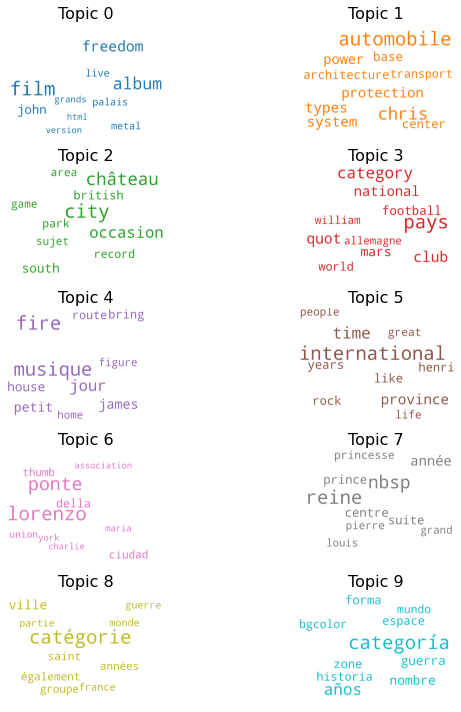

In [17]:
plot_topics_wordcloud(lda_model)

In [18]:
def format_topics_sentences(ldamodel=None, corpus=None, texts=None):
    
    sent_topics_df = pd.DataFrame()

    
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0: 
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)



Topics Representation into the data

In [19]:
df_topic_sents_keywords = format_topics_sentences(lda_model, bow_corpus, text)


In [20]:
df_topic_sents_keywords.head(10)

,Dominant_Topic,Perc_Contribution,Topic_Keywords,Cleaned_text
0,5.0,0.6801,"international, time, province, years, like, he...","[read, book, town, uses, order, pharmacist, ad..."
1,5.0,0.6977,"international, time, province, years, like, he...","[recipes, appreciated, family, small, large, r..."
2,5.0,0.6403,"international, time, province, years, like, he...","[ease, author, effort, meet, family, writing, ..."
3,5.0,0.7138,"international, time, province, years, like, he...","[milady, found, good, vein, anita, blake, base..."
4,5.0,0.7281,"international, time, province, years, like, he...","[greece, gentlemen, decided, visit, known, wor..."
5,7.0,0.4244,"reine, nbsp, année, centre, suite, prince, pri...","[tradition, lanfeust, troy, blamed, transition..."
6,5.0,0.6656,"international, time, province, years, like, he...","[frankly, volumes, cycle, stars, great, told, ..."
7,5.0,0.7347,"international, time, province, years, like, he...","[disappointed, book, read, catalog, situations..."
8,5.0,0.7710,"international, time, province, years, like, he...","[disappointed, book, expected, learn, experien..."
9,5.0,0.5064,"international, time, province, years, like, he...","[deafening, silence, olivier, delorme, breaks,..."
